<a href="https://colab.research.google.com/github/DinRazar/neural_networks/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


#### 1.2. Проектируем архитектуру для этой задачи

In [2]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


model = Sequential([
    Dense(16, input_shape=(13,), activation="relu"),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [3]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 339.4665 - mae: 15.4232 - val_loss: 53.8061 - val_mae: 4.9591
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 74.3060 - mae: 6.2758 - val_loss: 40.3689 - val_mae: 4.2153
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 58.5269 - mae: 5.5765 - val_loss: 37.4712 - val_mae: 3.9578
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.4802 - mae: 4.7675 - val_loss: 30.7495 - val_mae: 3.6483
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.5121 - mae: 4.7650 - val_loss: 44.6886 - val_mae: 4.6984
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.7742 - mae: 4.7213 - val_loss: 35.7436 - val_mae: 3.8513
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.5412 - mae: 4.6684 - val_loss: 30.9974 - val_mae: 3.8890
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.4802 - mae: 4.5929 - val_loss: 24.1381 - val_mae: 3.2909
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

#### 1.6. Делаем предсказания на тестовых данных

In [7]:
predicts = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [9]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predicts, y_test)

print(result.history['loss'])

[205.13626098632812, 70.91184997558594, 56.082664489746094, 43.92524337768555, 43.497806549072266, 43.16004180908203, 37.98290252685547, 34.91998291015625, 26.107948303222656, 29.17989730834961, 28.863178253173828, 29.469999313354492, 27.162397384643555, 28.168212890625, 31.157136917114258, 24.3385066986084, 24.333839416503906, 27.724164962768555, 25.480390548706055, 26.67035675048828, 24.488677978515625, 26.61612892150879, 27.202838897705078, 23.15923500061035, 24.13603973388672, 21.479127883911133, 22.93448257446289, 23.806638717651367, 20.134052276611328, 25.646556854248047, 21.016935348510742, 22.026874542236328, 21.981430053710938, 22.30375862121582, 21.891286849975586, 19.469356536865234, 20.100854873657227, 19.345169067382812, 20.5373592376709, 19.60955047607422, 21.85127067565918, 19.260835647583008, 17.941869735717773, 21.54547119140625, 20.25447654724121, 16.189136505126953, 18.13962745666504, 16.14011573791504, 17.30978012084961, 19.44520378112793, 14.292701721191406, 16.189

#### 1.8. Строим график обучения

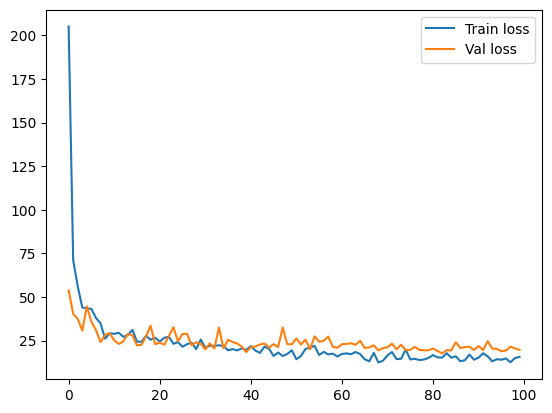

In [10]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], label='Train loss')
plt.plot(result.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [11]:
!pip install gradio

In [12]:
def predicts(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):

    input_data = np.array([[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]])
    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

    return f"${prediction[0,0]:,.2f}"

#### 2. Проверка обученной модели пользовательскими данными

In [14]:
import gradio as gr

interface = gr.Interface(
    fn=predicts,
    inputs=[
        gr.Slider(label="CRIM", minimum=0.006, maximum=89.000, step=0.1, value=0.02985),
        gr.Slider(label="ZN", minimum=0.0, maximum=100.0, step=1, value=0.0),
        gr.Slider(label="INDUS", minimum=0.4, maximum=28.0, step=0.1, value=2.180),
        gr.Slider(label="CHAS", minimum=0.0, maximum=1.0, step=0.1, value=0),
        gr.Slider(label="NOX", minimum=0.3, maximum=0.9, step=0.01, value=0.4580),
        gr.Slider(label="RM", minimum=3.6, maximum=8.8, step=0.1, value=6.4300),
        gr.Slider(label="AGE", minimum=2.9, maximum=100.0, step=0.1, value=58.70),
        gr.Slider(label="DIS", minimum=1.0, maximum=12.2, step=0.1, value=6.062),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=1, value=3),
        gr.Slider(label="TAX", minimum=180, maximum=720, step=1, value=222.0),
        gr.Slider(label="PTRATIO", minimum=2, maximum=22, step=0.1, value=18.70),
        gr.Slider(label="B", minimum=0.3, maximum=397.0, step=0.1, value=394.12),
        gr.Slider(label="LSTAT", minimum=1.7, maximum=38.0, step=0.1, value=5.21),
    ],

    live=True,
    outputs=gr.Text(label="Результат модели"),
)

interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d58cad81640548f7a4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
# Ваш код

### 3. Указываем путь к набору данных:

In [ ]:
# Ваш код

### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
# Ваш код

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
# Ваш код

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
# Ваш код

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
# Ваш код

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# Ваш код

#### 5.3. Компилируем модель:

In [ ]:
# Ваш код

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
# Ваш код

#### 6.2. Запустим процесс обучения модели:

In [ ]:
# Ваш код

#### 6.3. Загружаем лучшую модель:

In [ ]:
# Ваш код

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
# Ваш код

#### 7.2. Выведем матрицу ошибок

In [ ]:
# Ваш код

#### 7.3. Отобразим график обучения

In [ ]:
# Ваш код

### 8. Сохранение модели и меток классов:

In [ ]:
# Ваш код

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
# Ваш код

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
# Ваш код

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
# Ваш код

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Ваш код